<a href="https://colab.research.google.com/github/tayfununal/hamiltonian_ex/blob/main/eulerverlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

initial_point= [0., 1.]

def symplectic_euler(h=0.5, initial_point= [0., 1.]):

    t = np.arange(0, 2*np.pi, h)

    q = np.zeros(t.shape[0])
    p = np.zeros(t.shape[0])

    q[0] = initial_point[0]
    p[0] = initial_point[1]
    
    for i in range(0, t.shape[0]-1):
      q[i + 1] = (1-h**2) * q[i] + h * p[i]
      p[i + 1] = p[i] - h * q[i]

    return q, p, t

q , p, t = symplectic_euler()
print("shape of q :", q.shape ,"\nshape of p:", p.shape, "\nsize of t:", len(t))

shape of q : (13,) 
shape of p: (13,) 
size of t: 13


In [109]:
def grand_truth_plot(h = 0.1):
  t = np.arange(0,2*np.pi,0.3)
  q = np.sin(t)
  p = np.cos(t)
  plt.scatter(q,p)

def pred_plot(q, p):
  plt.plot(q[:, ], p[:,], c = "red")
  plt.xlabel('q')
  plt.ylabel('p')

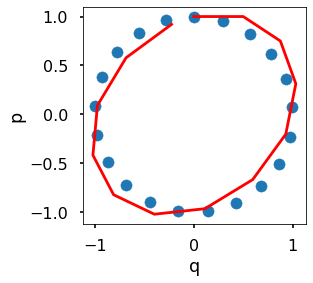

In [110]:
plt.figure(figsize = (4, 4))

# Simplectic solution plot
pred_plot(q=q, p=p)

# Grand truth solution plot
grand_truth_plot()
plt.show()

In [111]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

In [112]:
target = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
"""
shuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)
np.random.shuffle(shuffling)

target = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)
t = shuffling[:,2]
print('target:',target, '\nt:',t)
"""

"\nshuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)\nnp.random.shuffle(shuffling)\n\ntarget = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)\nt = shuffling[:,2]\nprint('target:',target, '\nt:',t)\n"

In [113]:
inp = Input(shape=(1,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_42 (Dense)            (None, 64)                128       
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [114]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt , loss="mse")
model.fit(x=t, y=target , epochs=1000, batch_size=16)

#model = lambda t: initial_point + t * model(t).numpy() # t değiştirilecek f(t)

Epoch 1/1000
1/1 [==============================] - 0s 387ms/step - loss: 0.5467
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4990
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4945
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4943
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4814
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4625
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4457
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4346
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4276
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4210
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4117
Epoch 12/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.4001
Epoch 13/1000
1/1 [====================

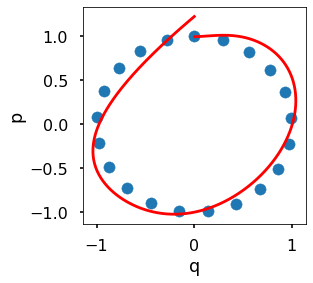

In [115]:
# prediction q and p Using NN and with test_t 
test_t = np.arange(0, 2*np.pi, 0.001)
prediction = model(test_t).numpy()

q = prediction[:,0]
p = prediction[:,1]

plt.figure(figsize = (4, 4))

# NN with mse solition 
pred_plot(q, p )

# Grand truth solution plot
grand_truth_plot()

plt.show()

In [116]:
# NN model with Hamiltonian preserved loss
inp = Input(shape=(2,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model2 = Model(inputs=inp, outputs=out)

In [117]:
def H(z):
  return tf.reduce_sum((z**2)/2,axis=1)

def custom_loss(y_true, y_pred):
  return (1/32) *(y_true - H(y_pred))**2

In [118]:
# Hamiltonian preserved for initial point and we extend this for all test_t
h_0 = np.array([0.5 for i in range(test_t.shape[0])])

In [119]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=opt, loss=custom_loss)
model2.fit(x = prediction, y = h_0, epochs=100, batch_size=32)

Epoch 1/100
197/197 [==============================] - 1s 3ms/step - loss: 5.9952e-04
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 6.4867e-05
Epoch 3/100
197/197 [==============================] - 1s 3ms/step - loss: 5.4639e-05
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 4.2425e-05
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 3.6473e-05
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 3.2586e-05
Epoch 7/100
197/197 [==============================] - 1s 3ms/step - loss: 3.1403e-05
Epoch 8/100
197/197 [==============================] - 1s 3ms/step - loss: 2.7778e-05
Epoch 9/100
197/197 [==============================] - 1s 3ms/step - loss: 2.7341e-05
Epoch 10/100
197/197 [==============================] - 1s 3ms/step - loss: 2.4899e-05
Epoch 11/100
197/197 [==============================] - 1s 3ms/step - loss: 2.0079e-05
Epoch 12/100
197/197 [==============================

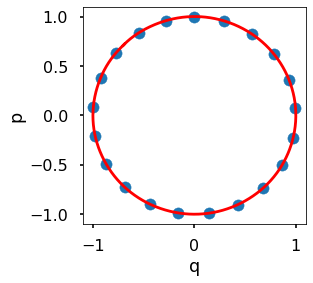

In [120]:
test_t = np.arange(0, 2*np.pi, 0.0001)

prediction_with_hamiltonian_preserved = model2(model(test_t))

q = prediction_with_hamiltonian_preserved[:,0]
p = prediction_with_hamiltonian_preserved[:,1]

plt.figure(figsize = (4, 4))
pred_plot(q=q, p=p)

grand_truth_plot()

plt.show()

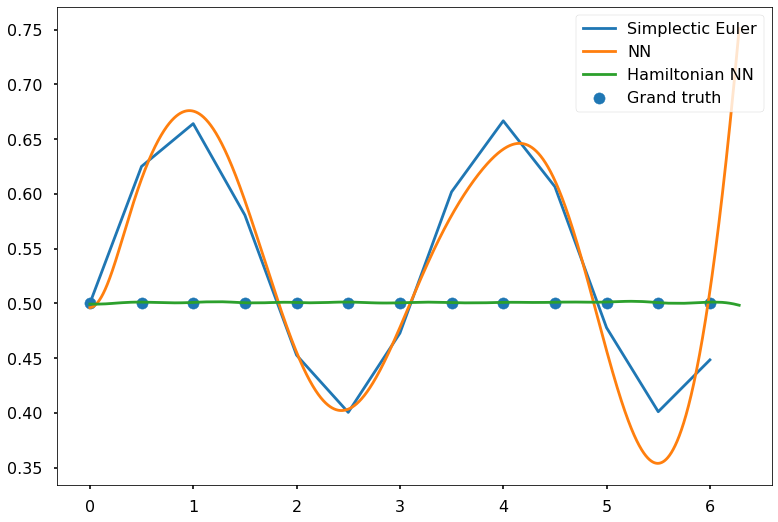

In [121]:
plt.scatter(t, [0.5 for i in range(t.shape[0])], label="Grand truth")
plt.plot(t ,H(target), label= "Simplectic Euler")
plt.plot(np.arange(0, 2*np.pi, 0.001), H(prediction), label= "NN")
plt.plot(test_t, H(prediction_with_hamiltonian_preserved), label="Hamiltonian NN")
plt.legend(loc="upper right")
plt.show()

In [122]:
model2(model(np.array([0.])))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.6926831 ,  0.72036344]], dtype=float32)>